In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

C:\Users\asus\AppData\Local\Temp\ipykernel_13344\3105315711.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
data = pd.read_excel('E:\KULIAH\TUGAS AKHIR\eh lib\o - c\data o-c.xlsx')
df = pd.DataFrame(data)
df

,Maxima (HJD),E,Referensi
0,2.433439e+06,0.000000,"Code, 1950"
1,2.433712e+06,3089.000000,"Ashbrook, 1952"
2,2.433738e+06,3383.000000,"Ashbrook, 1953"
3,2.433744e+06,3451.000000,"Ashbrook, 1954"
4,2.434486e+06,11841.000000,"Alania, 1954"
...,...,...,...
137,2.459741e+06,297497.998603,"Samolyk, 2023"
138,2.459741e+06,297498.993929,"Samolyk, 2023"
139,2.459742e+06,297499.989255,"Samolyk, 2023"
140,2.460025e+06,300709.000000,"Djumari, 2023"


In [3]:
cal = 2433438.6076 +  0.0884132445 * df['E']
ominc = df['Maxima (HJD)'] - cal
df['O - C'] = ominc
df['O - C']

0      0.000000
1      0.000388
2     -0.000606
3      0.000293
4      0.009172
         ...   
137    0.004611
138    0.004611
139    0.004611
140    0.005260
141    0.004946
Name: O - C, Length: 142, dtype: float64

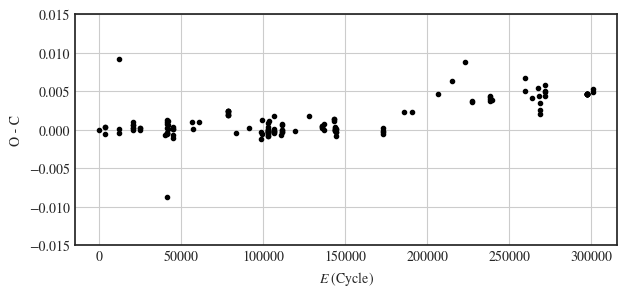

In [4]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(df['E'], df['O - C'], 'k.')
ax.set(xlabel='$E$ (Cycle)', ylabel='O - C', ylim=(-0.015,0.015))
ax.grid()
plt.savefig('o-c eh lib.jpg', dpi=300,bbox_inches='tight')

Gradient of the slope = 1.801598970542721e-08
The y-intercept = -0.0010318835501202989


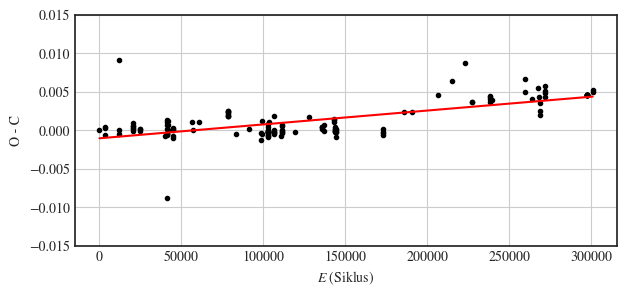

In [5]:
#linear regression for the transfer photon curve
from sklearn.linear_model import LinearRegression

#select mean counts as x and half variance as y
x = df['E'].values.reshape(-1,1)
y = df['O - C'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

#plot the data
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(x,y,c='k',marker='.')
ax.plot(x,y_predict,'r-')
ax.set(xlabel='$E$ (Siklus)', ylabel='O - C', ylim=(-0.015,0.015))
ax.grid()
#define the coefficient and intercept of y
coef_slope = model.coef_[0,0]
const_y = model.intercept_[0]

#print the results
print(f'Gradient of the slope = {coef_slope}')
print(f'The y-intercept = {const_y}')

plt.savefig('o-c eh lib.jpg', dpi=300,bbox_inches='tight')

Gradient of the slope = 0.0884132625
The y-intercept = 2433438.6066



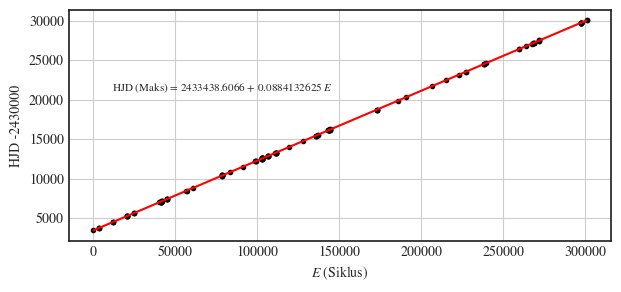

In [6]:
#linear regression for the transfer photon curve
#select mean counts as x and half variance as y
x1 = df['E'].values.reshape(-1,1)
y1 = df['Maxima (HJD)'].values.reshape(-1,1)

#fit the data
model_1 = LinearRegression()
model_1.fit(x1,y1)
y_predict_1 = model_1.predict(x1)

#plot the data
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(x1,y1-2430000,c='k',marker='.')
ax.plot(x1,y_predict_1-2430000,'r-')
ax.set(xlabel='$E$ (Siklus)', ylabel='HJD -2430000')
ax.grid()

#define the coefficient and intercept of y
coef_slope = model_1.coef_[0,0]
const_y = model_1.intercept_[0]
ax.annotate("HJD (Maks) = {0:.4f} + {1:.10f} $E$".format(const_y,coef_slope), xy=(0.5, 0.6), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=8)
#print the results
print(f'Gradient of the slope = {np.round(coef_slope,10)}')
print(f'The y-intercept = {np.round(const_y,4)}')
print(f'')
plt.savefig('hjd vs E eh lib.jpg', dpi=300,bbox_inches='tight')

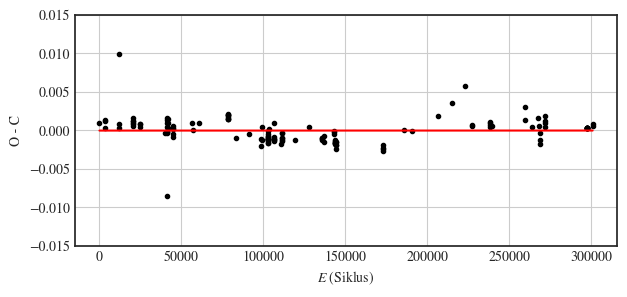

In [7]:
cal_new = 2433438.6066 +  0.0884132625 * df['E']
df['O - C new'] = df['Maxima (HJD)'] - cal_new
x2 = df['E'].values.reshape(-1,1)
y2 = df['O - C new'].values.reshape(-1,1)
model_2 = LinearRegression()
model_2.fit(x2,y2)
y_predict_2 = model_2.predict(x2)
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(x2,y2,c='k',marker='.')
ax.plot(x2,y_predict_2,'r-')
ax.set(xlabel='$E$ (Siklus)', ylabel='O - C', ylim=(-0.015,0.015))
ax.grid()
plt.savefig('o-c new.jpg', dpi=300,bbox_inches='tight')

In [6]:
df.to_excel('O - C Eh LIB.xlsx')

In [18]:
model_2.score(x2,y2)

1.1409667187711747e-06